In [1]:
import os
import collections
from Bio import SeqIO
dir_notebook = os.getenv( "HOME" )
file_include = dir_notebook + "/_include.ipynb"
%run $file_include

In [3]:
f = file("/media/sf_j1/MAP/analyzed_data/MA_all(190)/COG/details")
r = f.readlines()
f.close()

print len(r)
for x in range(len(r)):
    if (x == 2) or (x == 5) or (x == 8):
        continue
    print r[x]


9
REPSEQ_CORE.out / gene_num:  667 / cog_num 777

Counter({'S': 119, 'I': 79, 'R': 74, 'K': 61, 'J': 55, 'Q': 46, 'C': 45, 'E': 40, 'P': 38, 'H': 36, 'M': 30, 'G': 29, 'O': 28, 'T': 23, 'F': 22, 'L': 20, 'V': 17, 'U': 6, 'D': 5, 'N': 2, 'A': 1, 'X': 1})

REPSEQ_ACCESSORY.out / gene_num:  7622 / cog_num 8756

Counter({'S': 3294, 'R': 779, 'I': 625, 'K': 498, 'Q': 460, 'H': 316, 'C': 311, 'L': 284, 'P': 258, 'E': 254, 'T': 244, 'M': 234, 'X': 228, 'V': 219, 'G': 199, 'O': 160, 'J': 155, 'D': 105, 'F': 60, 'N': 38, 'U': 26, 'W': 7, 'A': 1, 'B': 1})

REPSEQ_UNIQUE.out / gene_num:  3410 / cog_num 3812

Counter({'S': 1947, 'R': 254, 'K': 235, 'I': 163, 'Q': 149, 'C': 116, 'L': 107, 'H': 96, 'P': 96, 'T': 84, 'V': 82, 'X': 82, 'G': 76, 'E': 64, 'O': 62, 'M': 57, 'J': 53, 'D': 37, 'F': 19, 'N': 16, 'U': 11, 'W': 6})



In [4]:
cog_lst = ["J", "A", "K", "L", "B", "D", "Y", "V", "T", "M", "N", "Z", "W", "U", "O", "X", "C", "G", "E", 
           "F", "H", "I", "P", "Q", "R", "S"]

In [5]:
dic_cog_num = {}

for x in cog_lst:
    if x not in dic_cog_num.keys():
        dic_cog_num[x] = 0
    dic_cog_num[x] += r[2].count(x)
    dic_cog_num[x] += r[5].count(x)
    dic_cog_num[x] += r[8].count(x)

print len(dic_cog_num)
print dic_cog_num

26
{'A': 2, 'C': 472, 'B': 1, 'E': 358, 'D': 147, 'G': 304, 'F': 101, 'I': 867, 'H': 448, 'K': 794, 'J': 263, 'M': 321, 'L': 411, 'O': 250, 'N': 56, 'Q': 655, 'P': 392, 'S': 5360, 'R': 1107, 'U': 43, 'T': 351, 'W': 13, 'V': 318, 'Y': 0, 'X': 311, 'Z': 0}


In [6]:
lst_cog_category = [ "J", "A", "K", "L", "B", "D", "Y", "V", "T", "M", "N", "Z", "W", "U", "O", "X", "C", "G", 
                    "E", "F", "H", "I", "P", "Q", "R", "S" ]
lst_cog_category_show = [ "J", "A", "K", "L", "B", "D", "Y", "V", "T", "M", "N", "Z", "W", "U", "O", "X", "C", "G", 
                         "E", "F", "H", "I", "P", "Q", "R", "S" ]
lst_cog_color = ["#da388e", "#e61f77", "#e61b53", "#dc1329", "#e7181f", 
                 "#ed711d", "#f2921e", "#f3d824", "#e5e638", "#adcf29", "#8ec325", "#76bc29", "#6bb945", "#6ebd67", "#439038", "#1e914a", 
                 "#6dc6cf", "#2bb5ea", "#2863ae", "#204da0", "#46469a", "#544599", "#504599", "#714698", 
                 "#696969", "#808080"]
dic_cog_color = { lst_cog_category[ i ]: lst_cog_color[ i ] for i in range( len( lst_cog_category ) ) }

In [7]:
name_pie = 'avium_pan-genome_total'

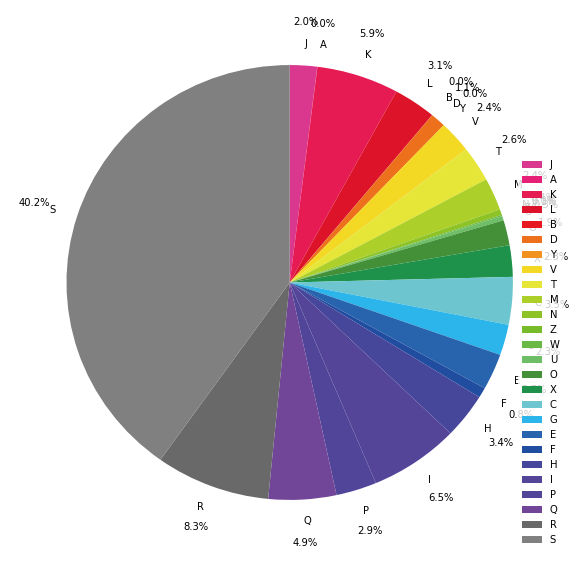

In [8]:
fig = plt.figure( figsize = ( 10, 10 ) )

lst_count = [ dic_cog_num[ n ] for n in lst_cog_category_show ]
lst_color = [ dic_cog_color[ m ] for m in lst_cog_category_show ]

plt.rcParams[ "patch.linewidth" ] = 0
#plt.pie( lst_count, labels = lst_label, colors = lst_color, autopct = "%1.0f%%", startangle = 65, counterclock = False, explode = [ 0.01, 0.02, 0.02 ] )
plt.pie( lst_count, labels = lst_cog_category, colors = lst_color, autopct = "%1.1f%%", counterclock = False, startangle = 90, pctdistance = 1.2 )
#plt.pie( lst_count, colors = lst_color, autopct = "%1.1f%%", counterclock = False, startangle = 90, pctdistance = 1.1 )

plt.legend(labels = lst_cog_category, loc="lower right")

plt.draw()
#plt.savefig( dir_notebook + "/" + name_pie + ".pdf" )
plt.savefig( name_pie + ".png" )
plt.savefig( name_pie + ".svg" )
plt.show()

In [9]:
name_bar = 'avium_total'

In [10]:
lst_alpha = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "T", 
             "U", "V", "W", "X", "Y", "Z", "R", "S"]

In [11]:
print len(lst_alpha)

26


In [12]:
max_0 = max(dic_cog_num.values())
print max_0
height_ = ( max_0 / 100 + 1 ) * 100
print height_

5360
5400


In [13]:
core_0 = []
for x in lst_alpha:
    core_0.append(dic_cog_num[x])
    
print len(core_0)
print core_0

26
[2, 1, 472, 147, 358, 101, 304, 448, 867, 263, 794, 411, 321, 56, 250, 392, 655, 351, 43, 318, 13, 311, 0, 0, 1107, 5360]


In [14]:
raw_data = {'cog_name': [m for m in lst_alpha ],
        'core': core_0 }
df = pd.DataFrame(raw_data, columns = ['cog_name', 'core'])
df

,cog_name,core
0,A,2
1,B,1
2,C,472
3,D,147
4,E,358
5,F,101
6,G,304
7,H,448
8,I,867
9,J,263


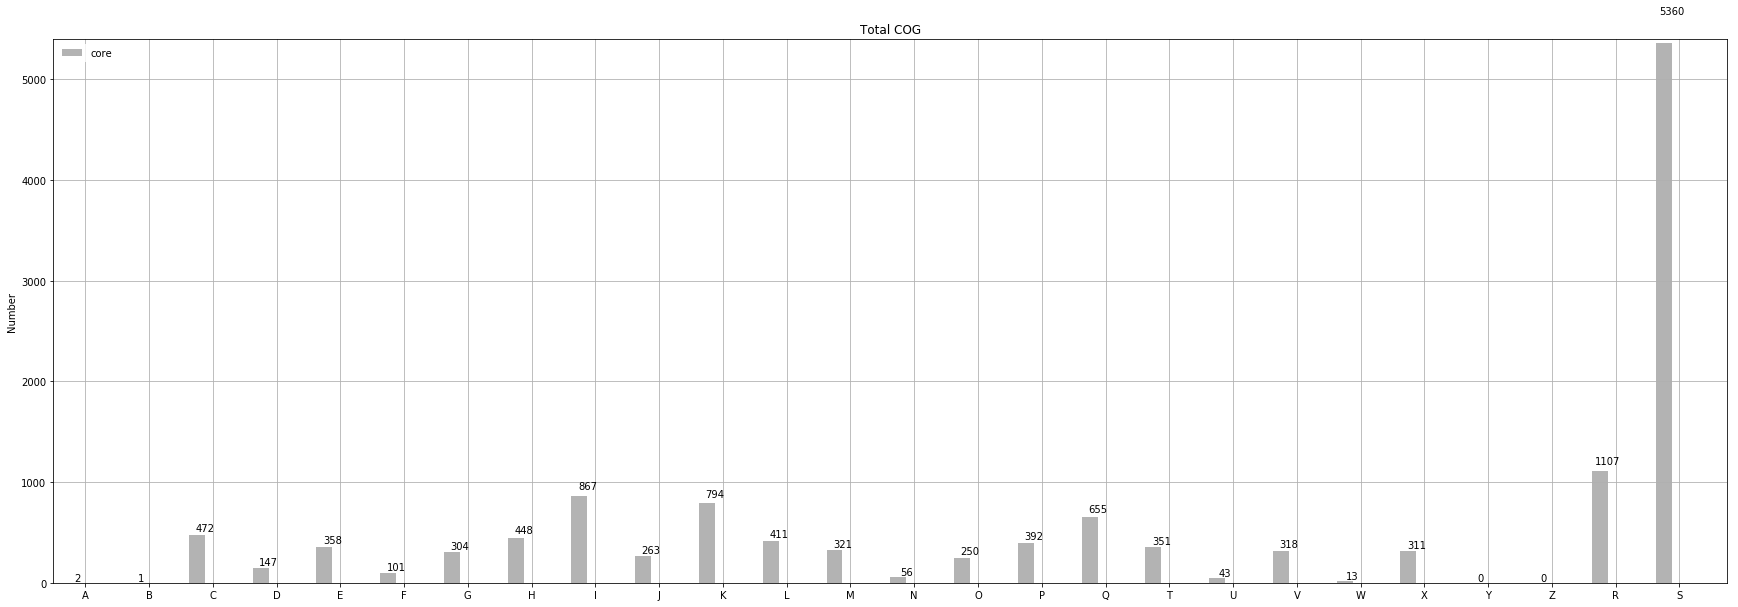

In [15]:
pos = list(range(len(df['core'])))
width = 0.25

fig, ax = plt.subplots(figsize=(30,10))

C = plt.bar(pos, df['core'], width, alpha=0.5, color='#696969', label=df['cog_name'][0])

ax.set_ylabel('Number')
ax.set_title('Total COG')
ax.set_xticks([p + 1.0 * width for p in pos])
ax.set_xticklabels(df['cog_name'])

for c in C:
    h = c.get_height()
    ax.text(c.get_x() + c.get_width() , 1.05 * h, "%d" % int(h), ha = "center", va = "bottom")

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, height_] )

# Adding the legend and showing the plot
plt.legend(['core', 'accessory', 'unique'], loc='upper left')
plt.grid()
plt.savefig( name_bar + "_cog_bar.pdf" )
plt.savefig( name_bar + "_cog_bar.png" )
plt.savefig( name_bar + "_cog_bar.svg" )
plt.show()